<a href="https://colab.research.google.com/github/hvmt2003/Ensemble-Learning-/blob/main/Voting_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [29]:
x,y=dataset=make_moons(n_samples=1000,noise=0.2)

In [30]:
df={'x1':x[:,0],'x2':x[:,1],'y':y}

In [31]:
dataset=pd.DataFrame(df)

In [32]:
dataset.head()

,x1,x2,y
0,0.950879,0.555111,0
1,1.880046,-0.000206,1
2,-0.577287,1.054594,0
3,0.677373,-0.679885,1
4,1.330450,-0.571873,1


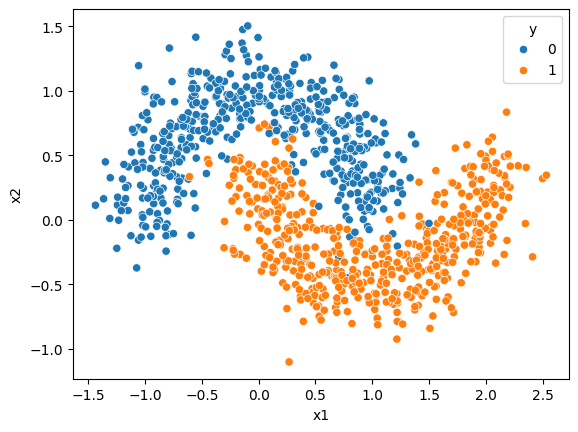

In [33]:
sns.scatterplot(x='x1',y='x2',hue='y',data=dataset)
plt.show()

In [34]:
x_a=dataset.iloc[:,:-1]
y_a=dataset.iloc[:,-1]

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x_a,y_a,test_size=0.2,random_state=42)

Models used are:
1.Decision Tree
2.SVM
3.Naive Bayes

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [42]:
dt=DecisionTreeClassifier()
svm=SVC()
nb=GaussianNB()

In [43]:
dt.fit(x_train,y_train)
dt.score(x_train,y_train),dt.score(x_test,y_test)

(1.0, 0.965)

In [44]:
sv=SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train),sv.score(x_test,y_test)

(0.97, 0.97)

In [45]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train),gnb.score(x_test,y_test)

(0.8625, 0.875)

Applying Ensemble Learning: Voting Classifier

In [47]:
from sklearn.ensemble import VotingClassifier

In [48]:
l=[('dt1',DecisionTreeClassifier()),('sv1',SVC()),('nb1',GaussianNB())]

In [55]:
vc=VotingClassifier(estimators=l,weights=[10,4,7])
vc.fit(x_train,y_train)
vc.score(x_train,y_train)*100,vc.score(x_test,y_test)*100

(97.375, 97.0)

In [57]:
prd={'dt1':dt.predict(x_test),'sv1':sv.predict(x_test),'nb1':gnb.predict(x_test),'vc':vc.predict(x_test)}
pd.DataFrame(prd)


,dt1,sv1,nb1,vc
0,1,1,0,1
1,0,0,0,0
2,1,1,1,1
3,0,0,0,0
4,1,1,1,1
...,...,...,...,...
195,1,1,0,1
196,1,1,1,1
197,1,1,1,1
198,1,1,1,1
